<a href="https://colab.research.google.com/github/TK2001000/AI-course-/blob/main/FYPSJERSEY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

In [8]:

# For manual upload in Colab, use:
from google.colab import files
uploaded = files.upload()

Saving FYP SJ 2ND.xlsx to FYP SJ 2ND (1).xlsx


In [10]:

# Load the dataset
file_path = list(uploaded.keys())[0]  # Automatically use the uploaded file
df = pd.read_excel(file_path)

In [11]:
# Show all data in the DataFrame
pd.set_option('display.max_rows', None)      # Show all rows
pd.set_option('display.max_columns', None)   # Show all columns
pd.set_option('display.width', None)         # Don't wrap lines
pd.set_option('display.max_colwidth', None)  # Full column width

print("Full Dataset:")
print(df)

Full Dataset:
     Dia   Guage   Count      SL      G-GSM 
0      26      24      20  0.350  147.000000
1      34      24      32  0.270  119.097222
2      30      24      20  0.325  158.307692
3      30      22      32  0.270  119.097222
4      22      24      20  0.355  144.929577
5      26      28      30  0.285  120.350877
6      20      24      30  0.275  124.727273
7      22      24      30  0.275  124.727273
8      26      20      20  0.335  153.582090
9      24      24      20  0.345  149.130435
10     24      20      20  0.320  160.781250
11     24      20      20  0.355  144.929577
12     22      24      30  0.295  116.271186
13     22      24      20  0.372  138.306452
14     34      20      16  0.340  189.154412
15     24      20      20  0.372  138.306452
16     30      22      32  0.265  121.344340
17     34      24      30  0.305  112.459016
18     26      24      32  0.265  121.344340
19     26      24      20  0.315  163.333333
20     30      24      20  0.370  139.054

In [13]:
# Step 4: Show all column names so you can confirm
print("🧾 Column names found in your Excel file:\n", df.columns.tolist())

🧾 Column names found in your Excel file:
 ['Dia ', 'Guage ', 'Count ', 'SL', 'G-GSM ']


In [15]:
X1 = df[['Count ', 'SL']]
y1 = df['G-GSM ']


In [25]:
# Train the model
model1 = LinearRegression()
model1.fit(X1, y1)

LinearRegression()

In [26]:
# Predict
pred1 = model1.predict(X1)

In [27]:
# RMSE
rmse1 = np.sqrt(mean_squared_error(y1, pred1))
print("\nCase 1: Predicting G-GSM from Count and SL")
print("RMSE:", rmse1)



Case 1: Predicting G-GSM from Count and SL
RMSE: 4.646891819957438


In [28]:
comparison1 = pd.DataFrame({
    'Actual G-GSM': y1.values,
    'Predicted G-GSM': pred1
})

In [29]:

pd.set_option('display.max_rows', None)
print(comparison1)

     Actual G-GSM  Predicted G-GSM
0      147.000000       146.332917
1      119.097222       115.742650
2      158.307692       155.683554
3      119.097222       115.742650
4      144.929577       144.462790
5      120.350877       120.217652
6      124.727273       123.957906
7      124.727273       123.957906
8      153.582090       151.943299
9      149.130435       148.203045
10     160.781250       157.553681
11     144.929577       144.462790
12     116.271186       116.477397
13     138.306452       138.104357
14     189.154412       170.243940
15     138.306452       138.104357
16     121.344340       117.612777
17     112.459016       112.737142
18     121.344340       117.612777
19     163.333333       159.423809
20     139.054054       138.852408
21     128.625000       127.631644
22     120.350877       120.217652
23     114.333333       114.607270
24     120.000000       127.631644
25     105.000000        75.401113
26     190.000000       159.023176
27     150.000000   

In [51]:
df.columns = df.columns.str.strip()


In [103]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Load the dataset
file_path = list(uploaded.keys())[0]  # Automatically use the uploaded file
df = pd.read_excel(file_path)
# Clean column names
df.columns = df.columns.str.strip()

# Drop rows with missing values
df.dropna(inplace=True)

# CASE 1: Predict G-GSM from Count and SL
X1 = df[['Count', 'SL']]
y1 = df['G-GSM']
model1 = LinearRegression().fit(X1, y1)
print("CASE 1: G-GSM = {:.2f} + {:.2f}*Count + {:.2f}*SL".format(
    model1.intercept_, model1.coef_[0], model1.coef_[1]
))

CASE 1: G-GSM = 378.10 + -5.04*Count + -374.03*SL


In [75]:
X2 = df[['SL', 'G-GSM']]
y2 = df['Count']

In [76]:

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)
model2 = LinearRegression().fit(X2_train, y2_train)
pred2 = model2.predict(X2_test)
rmse2 = np.sqrt(mean_squared_error(y2_test, pred2))

In [77]:
print("\nCase 2: Predicting Count from SL and G-GSM")
print("RMSE:", rmse2)
print("Predicted Count:", pred2)


Case 2: Predicting Count from SL and G-GSM
RMSE: 1.3654745508800936
Predicted Count: [26.46329683 24.2610076  29.11259224 24.72751518 28.65104271 21.1048371
 19.71116984 29.3190221  24.59003165 25.99590874 29.72049514 20.08160493
 24.70134112 26.54315388 24.59959219 24.72751518 28.35494144 19.92861088
 24.3482544  29.3190221  20.05829777 20.13151022 29.66987025 29.60336593
 29.67711744 26.3679777  29.66987025 29.36889618 20.21556814 20.11345298
 19.8759747  24.72256121 29.67762181 26.46798987 28.59930578 24.30589935
 24.64295002 29.71728245 24.6092885  20.17621111 19.48051866 24.68967123
 29.50772344 24.67607397 20.21775206 24.28377384 29.60336593 24.58955748
 29.72204144 36.8219819  29.11259224 24.63340611 26.17701884 26.25666222
 20.19719726 24.52239768 20.21342937 26.50406375 29.05017417 20.1698785
 19.63979502 26.46798987 26.20834859 29.00717015 19.85734225 24.69818383
 24.66854118 19.29811579 26.48475989 24.63340611 33.56520971 24.59003165
 19.71116984 26.58217719 28.2543991  20.

In [124]:

comparison2 = pd.DataFrame({
    'Actual Count': y2.values,
    'Predicted Count': y2_pred
})


In [125]:
pd.set_option('display.max_rows', None)
print(comparison2)

     Actual Count  Predicted Count
0              20        20.106574
1              32        31.088228
2              20        19.784841
3              32        31.088228
4              20        20.135102
5              30        29.774743
6              30        29.673541
7              30        29.673541
8              20        19.951491
9              20        20.066799
10             20        19.680758
11             20        20.135102
12             30        29.820337
13             20        20.154072
14             16        12.925051
15             20        20.154072
16             32        31.026585
17             30        29.815793
18             32        31.026585
19             20        19.561958
20             20        20.157760
21             20        19.955311
22             30        29.774743
23             30        29.824019
24             20        21.571800
25             40        33.730317
26             16        10.609518
27             24   

In [128]:
# CASE 2: Predict Count from SL and G-GSM
X2 = df[['SL', 'G-GSM ']]
y2 = df['Count ']
model2 = LinearRegression().fit(X2, y2)
print("CASE 2: Count = {:.2f} + {:.2f}*SL + {:.2f}*G-GSM".format(
    model2.intercept_, model2.coef_[0], model2.coef_[1]
))

CASE 2: Count = 72.82 + -71.90*SL + -0.19*G-GSM


In [105]:
# CASE 3: Predict SL using Count and G-GSM
X3 = df[['Count', 'G-GSM']]
y3 = df['SL']

In [106]:

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)
model3 = LinearRegression().fit(X3_train, y3_train)
pred3 = model3.predict(X3_test)
rmse3 = np.sqrt(mean_squared_error(y3_test, pred3))

In [107]:
print("\nCase 3: Predicting SL from Count and G-GSM")
print("RMSE:", rmse3)
print("Predicted SL:", pred3)


Case 3: Predicting SL from Count and G-GSM
RMSE: 0.0170989558757399
Predicted SL: [0.30654795 0.29612403 0.34119697 0.33751905 0.35343531 0.23937899
 0.31336307 0.33385754 0.31759613 0.37228115 0.29542559 0.33809029
 0.33082754 0.31574404 0.36402483 0.33751905 0.35962441 0.32614005
 0.30087511 0.33385754 0.33597537 0.3432703  0.28478857 0.2775797
 0.2857895  0.35617104 0.28478857 0.33177345 0.36795563 0.35302623
 0.32274093 0.34835104 0.31121891 0.34928237 0.35458754 0.29851584
 0.32281479 0.30355603 0.36324125 0.3492915  0.30223255 0.32886191
 0.26999704 0.32687156 0.35981199 0.29732404 0.2775797  0.36480406
 0.29635338 0.22021029 0.34119697 0.3217844  0.36552486 0.36200674
 0.35319257 0.36939029 0.36883615 0.31070277 0.34312014 0.34830231
 0.30972357 0.34928237 0.28875001 0.34438439 0.32159395 0.35348609
 0.32586697 0.29444486 0.30863921 0.3217844  0.19659065 0.31759613
 0.31336307 0.3244163  0.31318145 0.36257116 0.37088589 0.37231142
 0.33867271 0.335239   0.30759708 0.2857895  0.

In [129]:
comparison3 = pd.DataFrame({
    'Actual SL': y3.values,
    'Predicted SL': y3_pred
})

In [130]:
pd.set_option('display.max_rows', None)
print(comparison3)

     Actual SL  Predicted SL
0        0.350      0.346265
1        0.270      0.268162
2        0.325      0.320415
3        0.270      0.268162
4        0.355      0.350998
5        0.285      0.288944
6        0.275      0.278939
7        0.275      0.278939
8        0.335      0.331218
9        0.345      0.341394
10       0.320      0.314760
11       0.355      0.350998
12       0.295      0.298270
13       0.372      0.366138
14       0.340      0.297195
15       0.372      0.366138
16       0.265      0.263025
17       0.305      0.306985
18       0.265      0.263025
19       0.315      0.308926
20       0.370      0.364429
21       0.400      0.388270
22       0.285      0.288944
23       0.300      0.302700
24       0.400      0.407987
25       0.270      0.205795
26       0.370      0.295262
27       0.310      0.292110
28       0.385      0.396557
29       0.285      0.312606
30       0.355      0.244026
31       0.270      0.289746
32       0.355      0.339406
33       0.250

In [133]:
# CASE 3: Predict SL from Count and G-GSM
X3 = df[[ 'Count ','G-GSM ']]
y3 = df['SL']
model3 = LinearRegression().fit(X3, y3)

print("CASE 3: SL = {:.4f} + {:.4f}*Count + {:.4f}*G-GSM".format(
    model3.intercept_, model3.coef_[0], model3.coef_[1]
))


CASE 3: SL = 0.9188 + -0.0118*Count + -0.0023*G-GSM


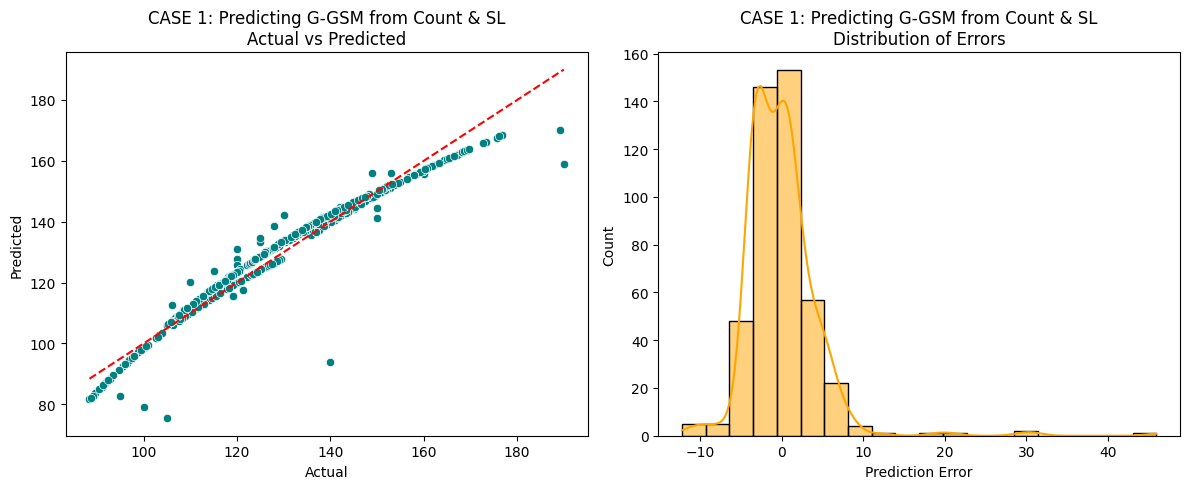

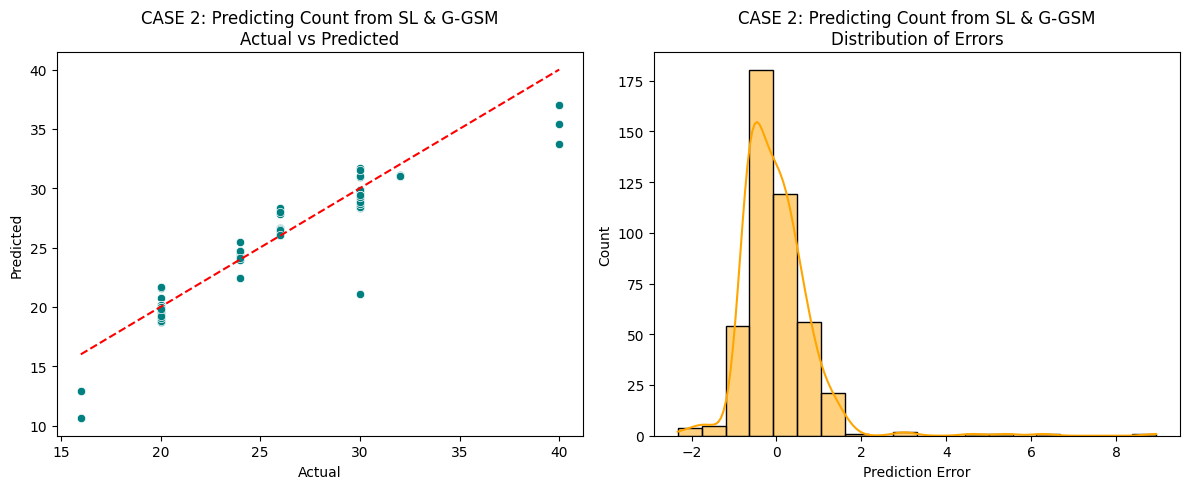

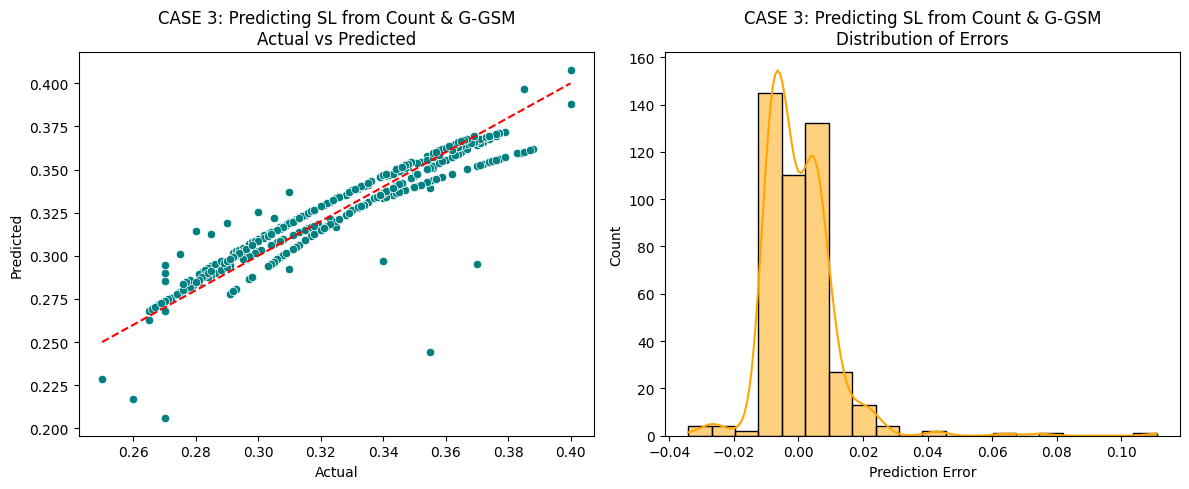

In [134]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Load the dataset
file_path = list(uploaded.keys())[0]  # Automatically use the uploaded file
df = pd.read_excel(file_path)


# ----- CASE 1: Predict G-GSM from Count and SL -----
X1 = df[['Count ', 'SL']]
y1 = df['G-GSM ']
model1 = LinearRegression().fit(X1, y1)
y1_pred = model1.predict(X1)

# ----- CASE 2: Predict Count from SL and G-GSM -----
X2 = df[['G-GSM ','SL' ]]
y2 = df['Count ']
model2 = LinearRegression().fit(X2, y2)
y2_pred = model2.predict(X2)

# ----- CASE 3: Predict SL from Count and G-GSM -----
X3 = df[['G-GSM ','Count ']]
y3 = df['SL']
model3 = LinearRegression().fit(X3, y3)
y3_pred = model3.predict(X3)

# Plotting function
def plot_results(actual, predicted, title, ylabel):
    plt.figure(figsize=(12, 5))

    # 2D Scatter: Actual vs Predicted
    plt.subplot(1, 2, 1)
    sns.scatterplot(x=actual, y=predicted, color='teal')
    plt.plot([actual.min(), actual.max()], [actual.min(), actual.max()], 'r--')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'{title}\nActual vs Predicted')

    # Distribution of Errors
    plt.subplot(1, 2, 2)
    errors = actual - predicted
    sns.histplot(errors, bins=20, kde=True, color='orange')
    plt.title(f'{title}\nDistribution of Errors')
    plt.xlabel('Prediction Error')

    plt.tight_layout()
    plt.show()

# ----- Show all 3 cases -----
plot_results(y1, y1_pred, 'CASE 1: Predicting G-GSM from Count & SL', 'G-GSM')
plot_results(y2, y2_pred, 'CASE 2: Predicting Count from SL & G-GSM', 'Count')
plot_results(y3, y3_pred, 'CASE 3: Predicting SL from Count & G-GSM', 'SL')